# Part 1: Maximum-Likelihood Estimation 

### Get Classes and Dat Set

In [1010]:
import numpy as np
import math
from numpy import matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree

data = open("data.txt","r") #data from txt file
dataArr = np.array([], dtype = float) #should have all data from data.txt in array form.
arr = []
for element in data:
    for i in element.replace("\n", "").split(","):
        arr.append(float(i))
    dataArr = np.append(dataArr, arr)
    arr =[]

testArr = np.reshape(dataArr,(-1, 9))
#get required attributes 2-4
reqCols = testArr[:,[1,2,3,8]] #should have required columns from data

# # print(reqCols)
#do they have it, or do they not.
class0 = []
labels = []
class1 = []
for i in reqCols:
#     print(type(i[3]))
    if i[3] == 0:
        labels.append(np.array(i[-1]))
        class0.append(np.array(i[:3]))
    elif i[3] == 1:
        labels.append(np.array(i[-1]))
        class1.append(np.array(i[:3]))


In [1011]:
import pandas as pd
dd = pd.read_csv("data.txt")
dd.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


###  Calculations for Mean, Cov, Std

In [1012]:
#train split 0 / 1
#test has both 
# #------------------------------------
# reqColsArr = np.asarray(reqCols) #unsplit appart array of all required rows and classifier 

# # total data split half and half

reqColTrain = reqCols[0:384]
reqColTest = reqCols[384:]


coltrain1 = reqColTrain[reqColTrain[:,-1]==1]
coltrain0 = reqColTrain[reqColTrain[:,-1]==0]

train_features = reqColTrain[:,:3]
test_features = reqColTest[:,:3]
test_labels = reqColTest[:,-1]



mu1 = np.mean(coltrain1[:,:3], axis=0).reshape(3,1)
mu0 = np.mean(coltrain0[:,:3], axis=0).reshape(3,1)
covar0 = np.cov(coltrain0[:,:3].T)
covar1 = np.cov(coltrain1[:,:3].T)
std0 = np.std(coltrain0[:,:3].T)
std1 = np.std(coltrain1[:,:3].T)

freq0 = len(coltrain0) / len(reqColTrain)
freq1 = len(coltrain1) / len(reqColTrain)


## Maximum-Liklihood Calculations

In [1013]:
def mvg(mu, cov, x):
    p1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    p2 = np.exp((-1/2) * (np.matmul(np.matmul((x-mu).T[0],np.linalg.inv(cov)),(x-mu))))
    prob = p1 * p2
    return prob

In [1014]:
mleResult = []
for j in range(10):
    correct = 0
    guess = 0
    np.random.shuffle(reqCols)
    reqColTrain = reqCols[0:384]
    reqColTest = reqCols[384:]
    for (i,label) in zip(test_features,test_labels):
        prob0 = mvg(mu0, covar0, i.reshape(3,1)) #test0/
        prob1 = mvg(mu1, covar1, i.reshape(3,1)) #test1
        if(prob0 > prob1):
            guess = 0
        elif(prob0 < prob1):
            guess = 1
        if(guess == label):
            correct +=1
        accuracy = correct /test_features.shape[0]
    mleResult.append(accuracy)
display(mleResult)
accuracySTD = np.std(np.array(mleResult), axis = 0)
print("STD")
display(accuracySTD)
accuracyMean = np.mean(np.array(mleResult), axis=0)
print("MEAN")
display(accuracyMean)


[0.7161458333333334,
 0.6848958333333334,
 0.6979166666666666,
 0.7317708333333334,
 0.7239583333333334,
 0.703125,
 0.7265625,
 0.7161458333333334,
 0.7213541666666666,
 0.7135416666666666]

STD


0.01363151284198167

MEAN


0.71354166666666674

## Naive Bayes

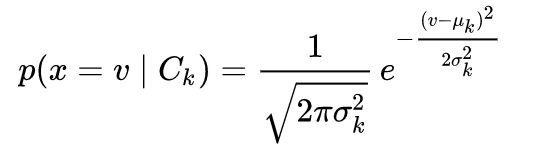

In [1015]:
def gnb(mu, sig, x):
    p1 = (1/math.sqrt(2*math.pi*(sig**2)))
    p2 = (math.e**(-1*(((x-mu)**2)/(2*(sig**2)))))
    prod = p1 * p2
    return prod

In [1016]:
#product of probability of each product given the class
#get each class prob


In [1017]:
gnbResult = []
for j in range(10):
    correct = 0
    guess = 0
    np.random.shuffle(reqCols)
    reqColTrain = reqCols[0:384] #first half of dataset
    reqColTest = reqCols[384:] #second half of dataset

    #class conditional means
    for (i,label) in zip(test_features,test_labels):    
#         print(label)
#         print(test_labels)
        prob0 = gnb(mu0,std0, i.reshape(3,1)) #test0 
    
        pd0 = np.prod(prob0) #prob0 is a array of arrays, so doing .prob multiplies all values together to obtain a scalar val
      
        probabiltyComparison0 = freq0 * pd0 #this is the multiple of the frequency of 0, by the probability of 0
        
        prob1 = gnb(mu1,std1, i.reshape(3,1)) #test1 
        pd1 = np.prod(prob1)

        probabilityComparison1 = freq1 * pd1
        if(pd0> pd1):
            guess = 0
        elif(pd0 < pd1):
            guess = 1
        if(guess == label):
            correct +=1
        accuracy = correct/test_features.shape[0]
    gnbResult.append(accuracy)
display(gnbResult)
accuracyStdGNB = np.std(np.array(gnbResult), axis = 0)
print("STD GNB")
display(accuracyStdGNB)
accuracyMeanGNB = np.mean(np.array(gnbResult), axis=0)
print("MEAN GNB")
display(accuracyMeanGNB)


[0.7291666666666666,
 0.734375,
 0.7369791666666666,
 0.7317708333333334,
 0.71875,
 0.7447916666666666,
 0.7265625,
 0.7317708333333334,
 0.7291666666666666,
 0.7395833333333334]

STD GNB


0.0068702635199338093

MEAN GNB


0.73229166666666656

### K-Nearest Neighbor

In [1019]:
tree = KDTree(train_features)
n = 0
predictions = []
while n < len(train_features):
    count1 = 0
    count0 = 0
    dist, ind = tree.query([test_features[n]], k=3)
    i = 0
    while i < len(ind):
        neighborClass = train_labels[ind[0][i]]
        if (neighborClass == 1):
            count1 += 1
        elif(neighborClass == 0):
            count0 += 1
        i += 1
    if(count1 > count0):
        predictions.append(1)
    elif(count1 < count0):
        predictions.append(0)
    n += 1
count = 0
for i in test_labels:
    if (test_labels[int(i)] == predictions[int(i)]):
        count += 1
    accuracyKNN = count/len(test_labels)
accuracyKNN


0.65625

### Parzen Cubic Window

In [ ]:
# for prediction on sample s: create cube around s. S neighbors are data where distance from x's, y's, 
#and z's are within 10 each other
# neighbors vote on class. 